In [1]:
import numpy as np
from utils.hdf_utils import *
from utils.plot_utils import *
import matplotlib.pyplot as plt

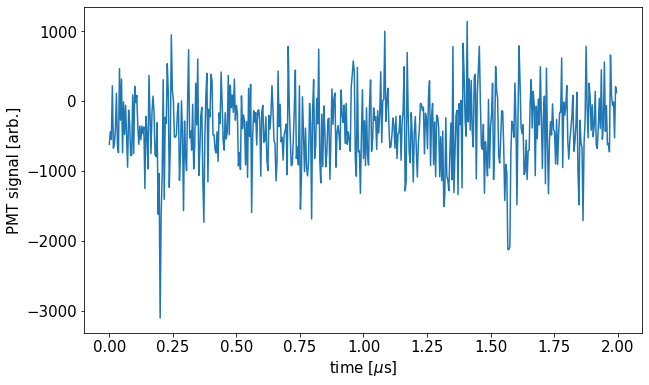

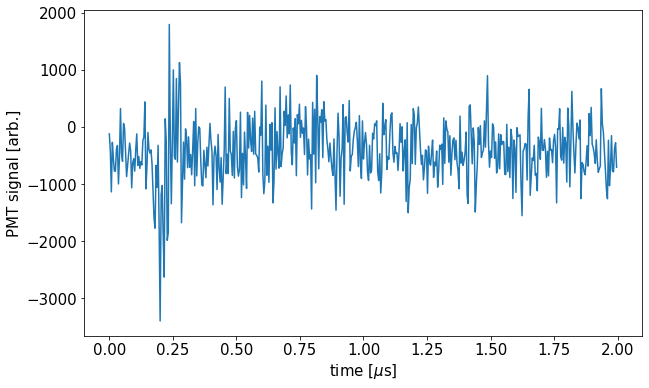

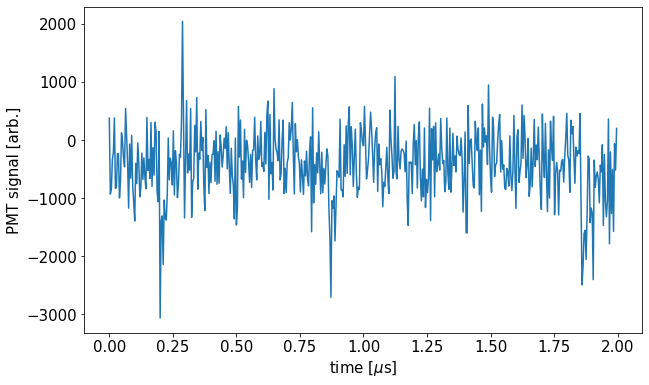

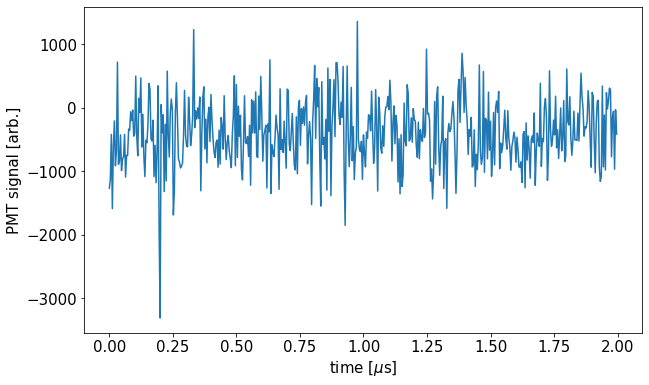

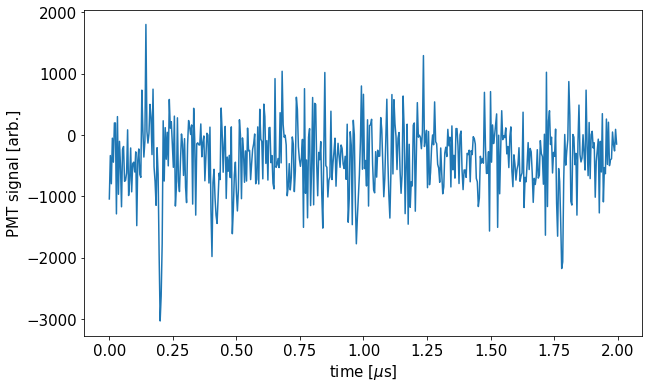

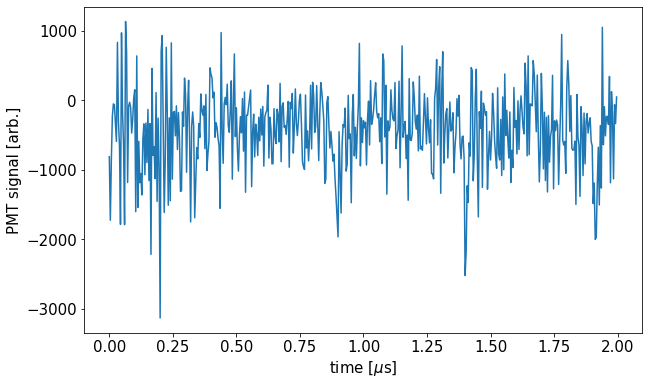

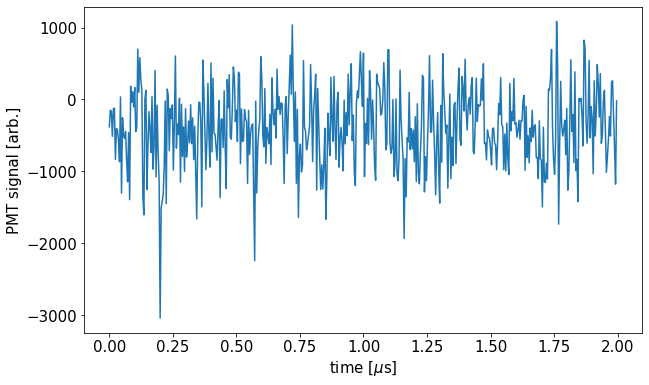

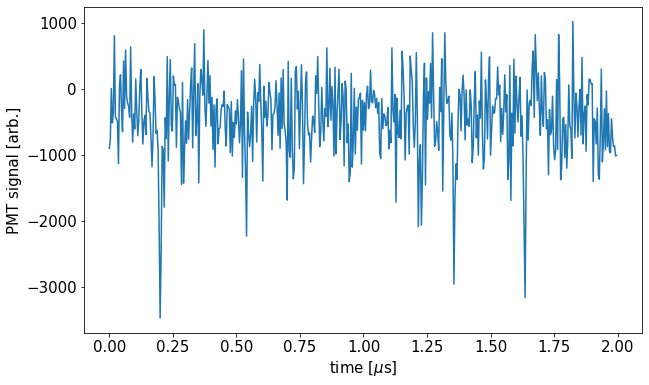

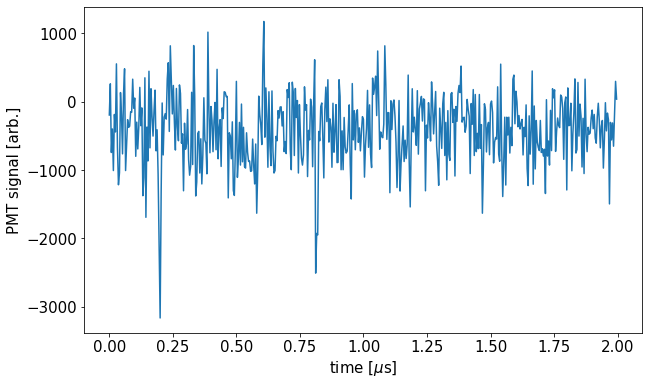

In [2]:
fname = "2020_6_10_PMT_checks.hdf"
dset_name = "1591814969 pmt_checks"

pxie, pxie_time, _ = load_measurement_data_devices(fname, dset_name, (), ts_ch = 'ch2')

dset = 1
b = 50
l = 500
pulse_limit = -3000

indices = np.where(pxie[dset] < pulse_limit)[0]
for idx in indices[:10]:
    if idx > b:
        fig, ax = plt.subplots(figsize = (10,6))
        ax.plot(np.arange(l)*4e-9*1e6, pxie[dset][idx-b:idx-b+l].flatten())

        ax.set_xlabel(r'time [$\mu$s]')
        ax.set_ylabel('PMT signal [arb.]')

        set_fontsize(ax,15)

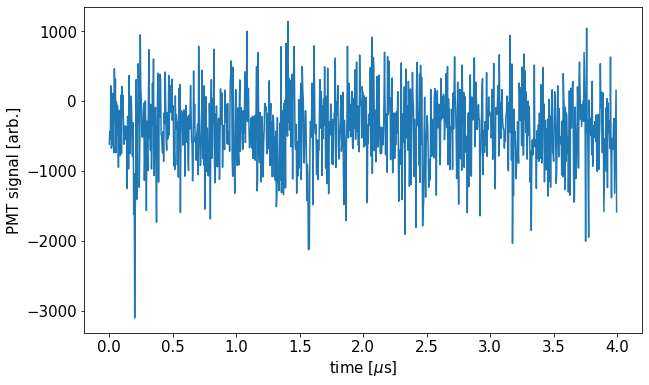

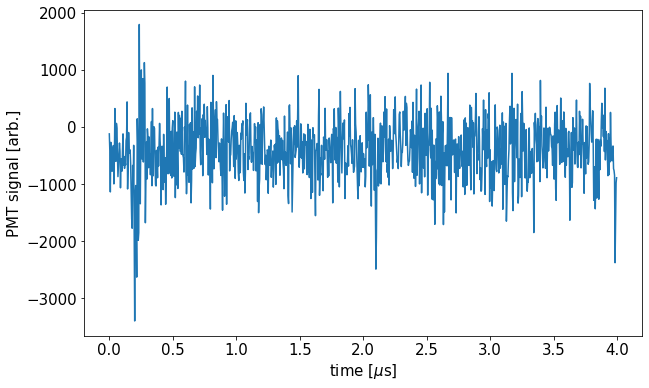

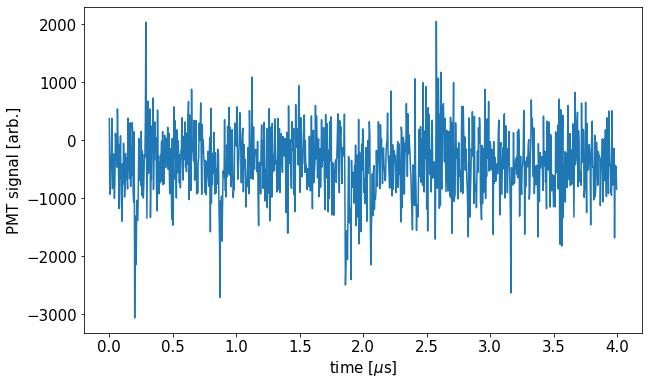

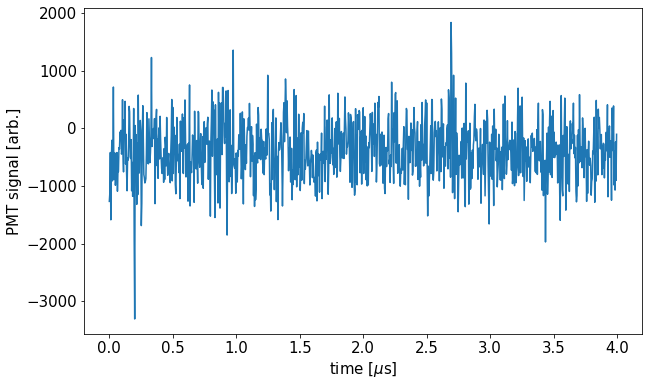

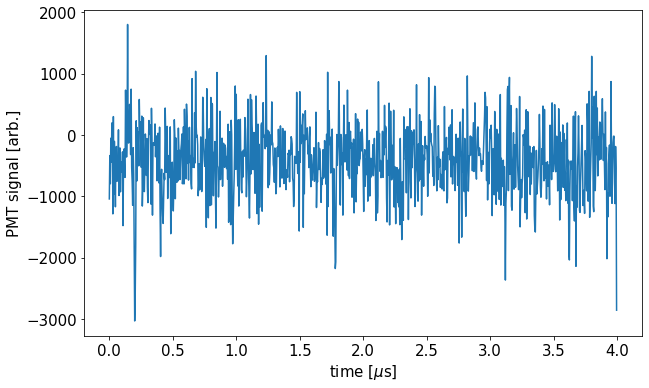

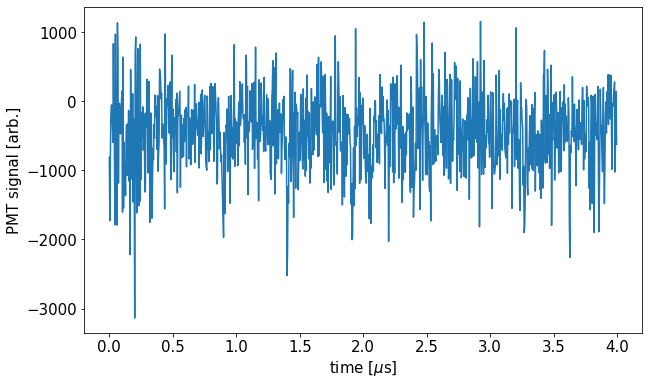

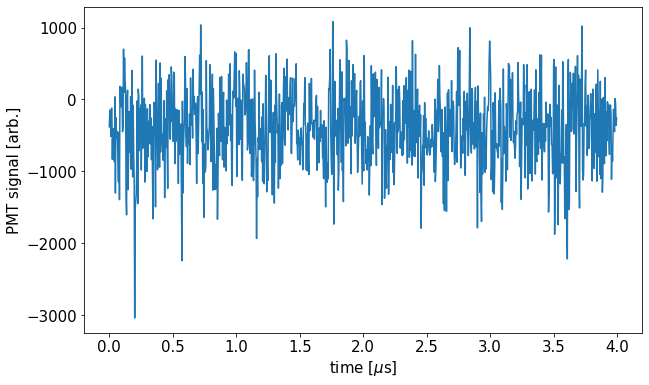

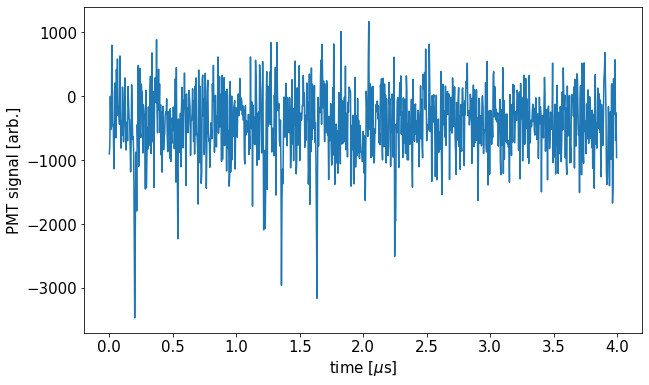

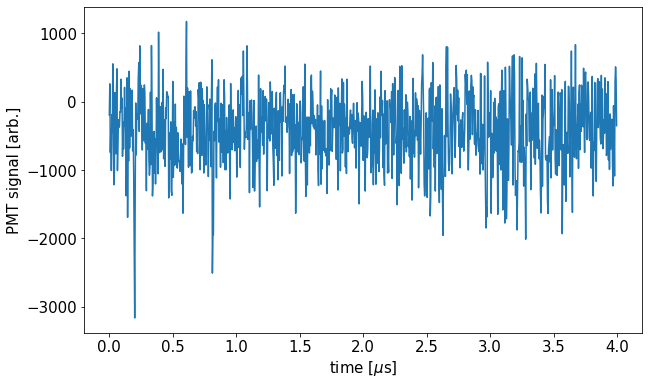

In [3]:
fname = "2020_6_10_PMT_checks.hdf"
dset_name = "1591814969 pmt_checks"

pxie, pxie_time, _ = load_measurement_data_devices(fname, dset_name, (), ts_ch = 'ch2')

dset = 1
b = 50
l = 1000
pulse_limit = -3000

indices = np.where(pxie[dset] < pulse_limit)[0]
for idx in indices[:10]:
    if idx > b:
        fig, ax = plt.subplots(figsize = (10,6))
        ax.plot(np.arange(l)*4e-9*1e6, pxie[dset][idx-b:idx-b+l].flatten())

        ax.set_xlabel(r'time [$\mu$s]')
        ax.set_ylabel('PMT signal [arb.]')

        set_fontsize(ax,15)

In [4]:
def average_photons(fname, dset_names, pulse_limit = -2500, b = 50, l = 1000):
    heights = []
    avg = np.zeros([l])
    cnt = 0
    for dset_name in dset_names:
        pxie, pxie_time, _ = load_measurement_data_devices(fname, dset_name, (), ts_ch = 'ch2')
        for dset in pxie.keys():
            indices = np.where(pxie[dset] < pulse_limit)[0]
            for idn, idx in enumerate(indices):
                if idx - indices[idn-1] > 100:
                    if (idx-b+l < len(pxie[dset])) & (idx >= b):
                        avg += pxie[dset][idx-b:idx-b+l].flatten()
                        heights.append(pxie[dset][idx-b:idx-b+l].min())
                        cnt += 1
    avg /= cnt
    print(f'averaged together {cnt} detected photons')

    fig, ax = plt.subplots(figsize = (10,6))
    ax.plot(np.arange(l)*4e-9*1e6, avg)

    ax.set_xlabel(r'time [$\mu$s]')
    ax.set_ylabel('PMT signal [arb.]')

    set_fontsize(ax,15)
    
    return avg, heights

## Ambient Lights Full, PMT from old measurements, shielded with Thorlabs blackened alu foil

averaged together 10626 detected photons


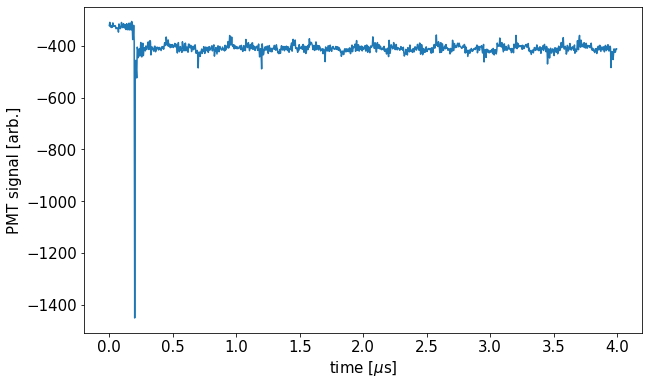

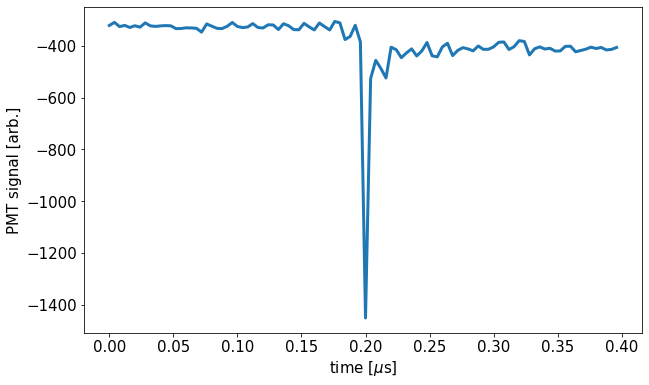

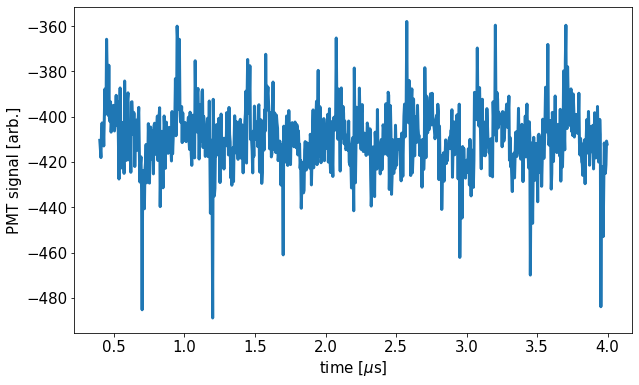

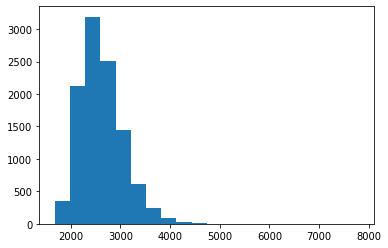

In [5]:
avg, heights = average_photons("2020_6_10_PMT_checks.hdf", 
                               ["1591814969 pmt_checks"],
                               pulse_limit = -1200)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(np.arange(len(avg))[:100]*4e-9*1e6, avg[:100], lw = 3)

ax.set_xlabel(r'time [$\mu$s]')
ax.set_ylabel('PMT signal [arb.]')

set_fontsize(ax,15)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(np.arange(len(avg))[100:]*4e-9*1e6, avg[100:], lw = 3)

ax.set_xlabel(r'time [$\mu$s]')
ax.set_ylabel('PMT signal [arb.]')

set_fontsize(ax,15)

plt.figure()
plt.hist(np.abs(heights), bins = 20);

## Ambient Lights Low, PMT from old measurements, shielded with Thorlabs blackened alu foil

averaged together 6600 detected photons


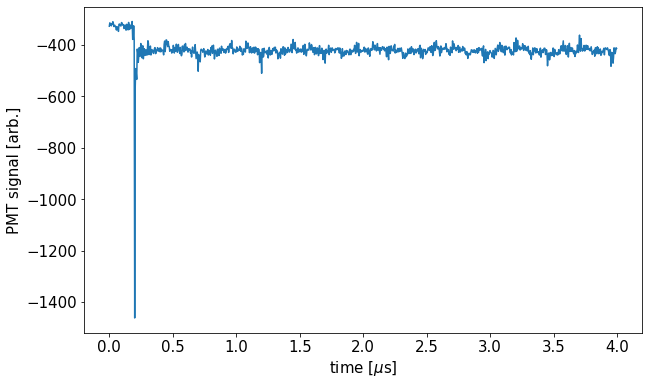

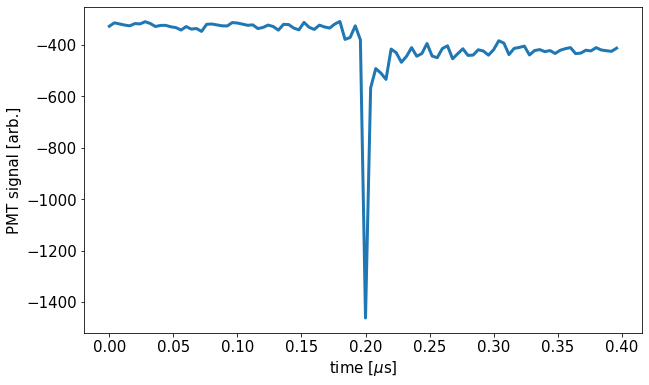

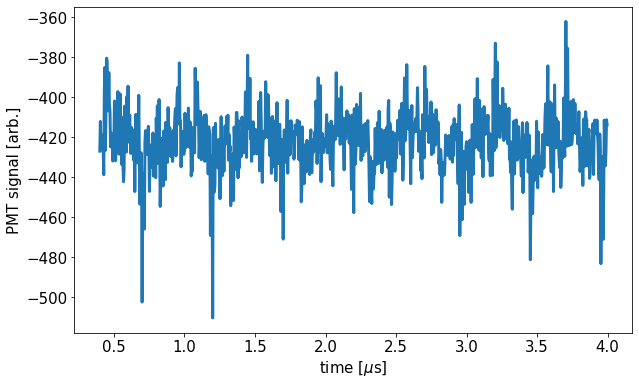

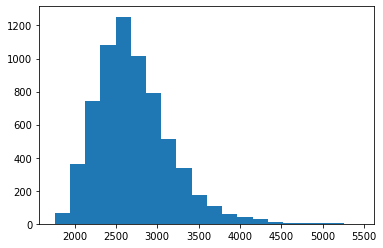

In [6]:
avg, heights = average_photons("2020_6_10_PMT_checks.hdf", 
                               ["1591815102 pmt_checks"],
                               pulse_limit = -1200)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(np.arange(len(avg))[:100]*4e-9*1e6, avg[:100], lw = 3)

ax.set_xlabel(r'time [$\mu$s]')
ax.set_ylabel('PMT signal [arb.]')

set_fontsize(ax,15)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(np.arange(len(avg))[100:]*4e-9*1e6, avg[100:], lw = 3)

ax.set_xlabel(r'time [$\mu$s]')
ax.set_ylabel('PMT signal [arb.]')

set_fontsize(ax,15)

plt.figure()
plt.hist(np.abs(heights), bins = 20);

## Ambient Light Off, PMT from old measurements back in detection chamber

averaged together 165157 detected photons


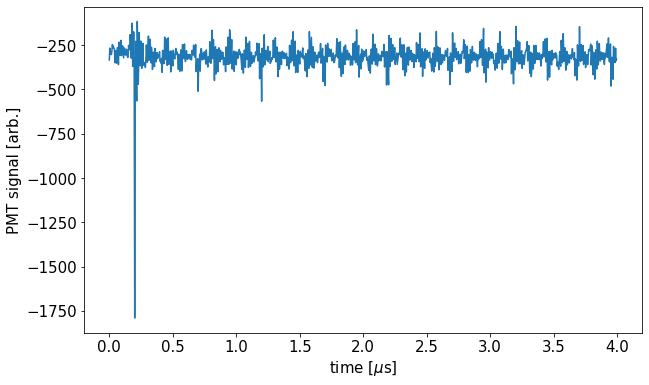

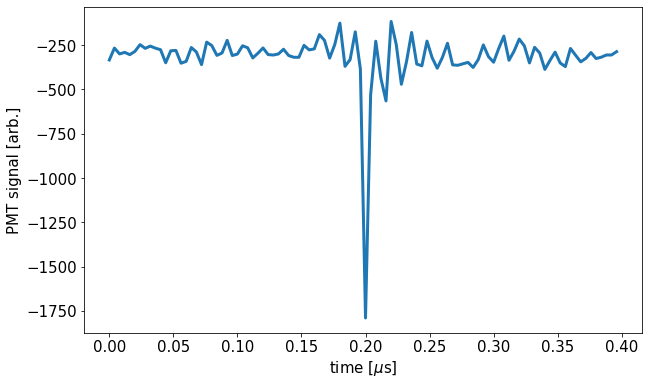

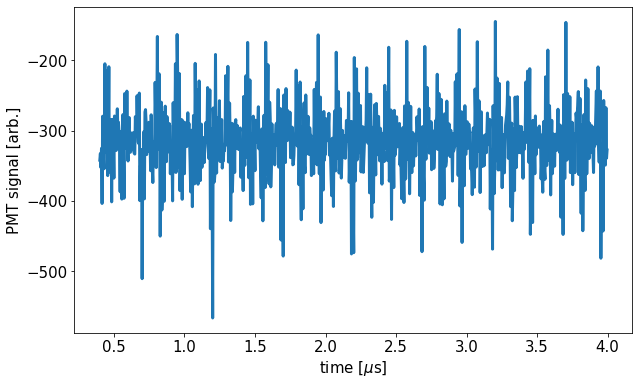

In [7]:
avg, heights = average_photons("2020_6_10_PMT_checks.hdf", 
                               ["1591822218 pmt_checks", "1591822209 pmt_checks"],
                               pulse_limit = -1500)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(np.arange(len(avg))[:100]*4e-9*1e6, avg[:100], lw = 3)

ax.set_xlabel(r'time [$\mu$s]')
ax.set_ylabel('PMT signal [arb.]')

set_fontsize(ax,15)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(np.arange(len(avg))[100:]*4e-9*1e6, avg[100:], lw = 3)

ax.set_xlabel(r'time [$\mu$s]')
ax.set_ylabel('PMT signal [arb.]')

set_fontsize(ax,15)

(array([1.54510e+04, 6.64950e+04, 1.01036e+05, 7.53350e+04, 4.22620e+04,
        2.01400e+04, 9.41000e+03, 3.86400e+03, 1.41700e+03, 5.64000e+02,
        2.59000e+02, 1.17000e+02, 9.20000e+01, 3.30000e+01, 5.00000e+00,
        7.00000e+00, 1.90000e+01, 4.00000e+00, 8.00000e+00, 3.00000e+00]),
 array([2004. , 2376.6, 2749.2, 3121.8, 3494.4, 3867. , 4239.6, 4612.2,
        4984.8, 5357.4, 5730. , 6102.6, 6475.2, 6847.8, 7220.4, 7593. ,
        7965.6, 8338.2, 8710.8, 9083.4, 9456. ]),
 <a list of 20 Patch objects>)

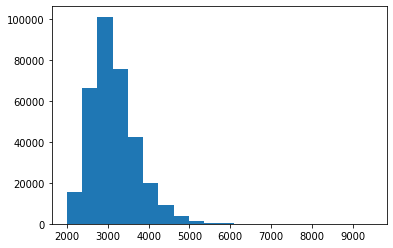

In [11]:
plt.hist(np.abs(heights), bins = 20)

## Ambient Light Low, PMT from old measurements back in detection chamber

averaged together 336521 detected photons


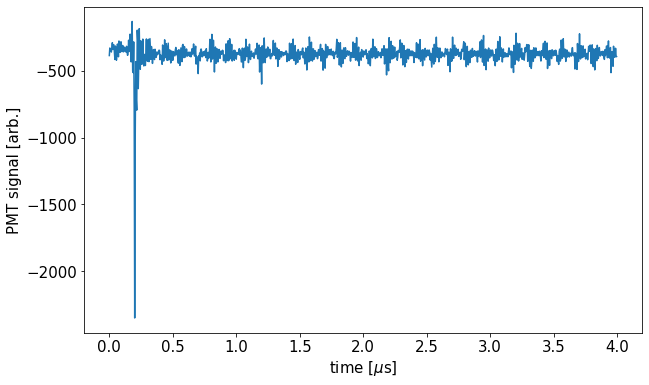

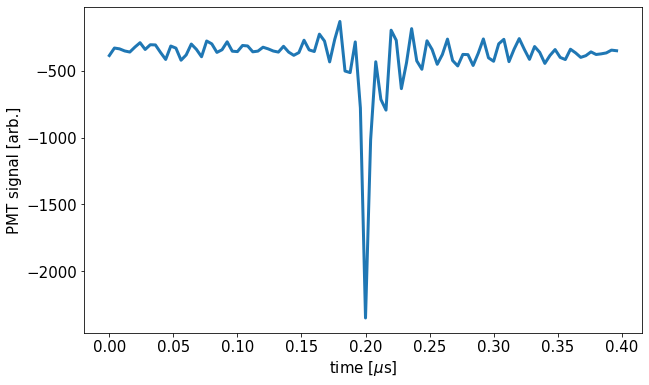

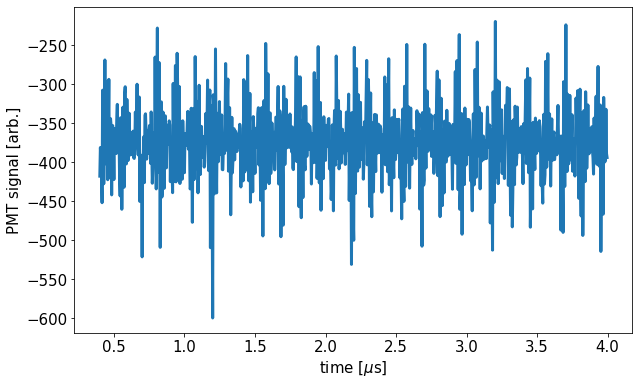

In [12]:
avg, heights = average_photons("2020_6_10_PMT_checks.hdf", 
                               ["1591822209 pmt_checks", "1591822165 pmt_checks", "1591822179 pmt_checks",
                                "1591822187 pmt_checks"], 
                               pulse_limit = -2000)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(np.arange(len(avg))[:100]*4e-9*1e6, avg[:100], lw = 3)

ax.set_xlabel(r'time [$\mu$s]')
ax.set_ylabel('PMT signal [arb.]')

set_fontsize(ax,15)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(np.arange(len(avg))[100:]*4e-9*1e6, avg[100:], lw = 3)

ax.set_xlabel(r'time [$\mu$s]')
ax.set_ylabel('PMT signal [arb.]')

set_fontsize(ax,15)

(array([1.54510e+04, 6.64950e+04, 1.01036e+05, 7.53350e+04, 4.22620e+04,
        2.01400e+04, 9.41000e+03, 3.86400e+03, 1.41700e+03, 5.64000e+02,
        2.59000e+02, 1.17000e+02, 9.20000e+01, 3.30000e+01, 5.00000e+00,
        7.00000e+00, 1.90000e+01, 4.00000e+00, 8.00000e+00, 3.00000e+00]),
 array([2004. , 2376.6, 2749.2, 3121.8, 3494.4, 3867. , 4239.6, 4612.2,
        4984.8, 5357.4, 5730. , 6102.6, 6475.2, 6847.8, 7220.4, 7593. ,
        7965.6, 8338.2, 8710.8, 9083.4, 9456. ]),
 <a list of 20 Patch objects>)

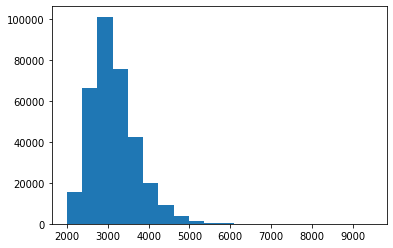

In [13]:
plt.hist(np.abs(heights), bins = 20)

## Replacement PMT in detection chamber, no ambient light, weird pulses

averaged together 138029 detected photons


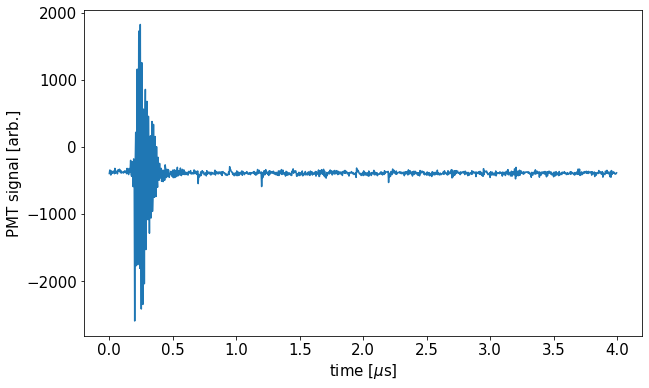

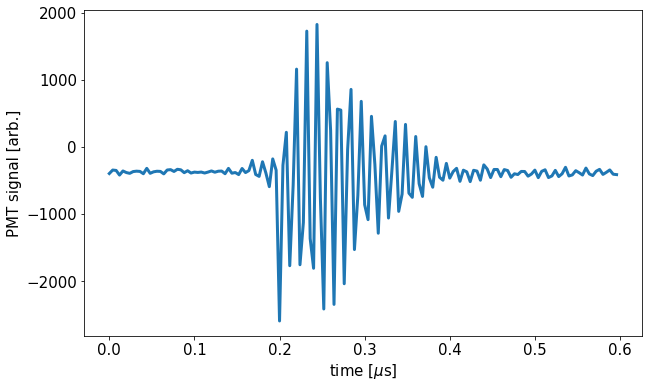

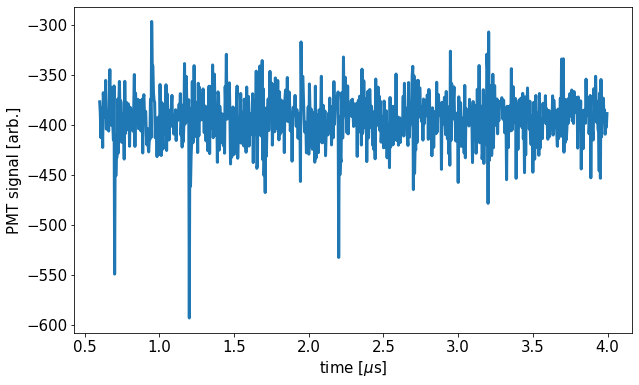

In [14]:
avg, heights = average_photons("2020_6_10_PMT_checks.hdf", ['1591817029 pmt_checks', '1591817053 pmt_checks'], pulse_limit = -2000)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(np.arange(len(avg))[:150]*4e-9*1e6, avg[:150], lw = 3)

ax.set_xlabel(r'time [$\mu$s]')
ax.set_ylabel('PMT signal [arb.]')

set_fontsize(ax,15)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(np.arange(len(avg))[150:]*4e-9*1e6, avg[150:], lw = 3)

ax.set_xlabel(r'time [$\mu$s]')
ax.set_ylabel('PMT signal [arb.]')

set_fontsize(ax,15)

(array([6.5900e+02, 5.0900e+02, 1.7600e+02, 4.5000e+01, 8.0000e+00,
        5.0000e+00, 7.0000e+00, 9.0000e+00, 3.5400e+02, 3.4260e+03,
        1.0642e+04, 1.6485e+04, 2.2054e+04, 2.9995e+04, 3.1611e+04,
        1.7886e+04, 3.7140e+03, 3.8300e+02, 5.7000e+01, 4.0000e+00]),
 array([ 2080. ,  2969.2,  3858.4,  4747.6,  5636.8,  6526. ,  7415.2,
         8304.4,  9193.6, 10082.8, 10972. , 11861.2, 12750.4, 13639.6,
        14528.8, 15418. , 16307.2, 17196.4, 18085.6, 18974.8, 19864. ]),
 <a list of 20 Patch objects>)

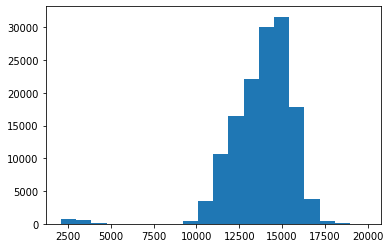

In [15]:
plt.hist(np.abs(heights), bins = 20)

### Removed PMT, placed on lasertable
Covered with Thorlabs blackened alu foil to prevent too many photons from hitting the PMT.

In [16]:
def get_photon_pulses(fname, dset_names, pulse_limit = -6000, b = 50, l = 1000):
    data = []
    for dset_name in dset_names:
        pxie, pxie_time, _ = load_measurement_data_devices(fname, dset_name, (), ts_ch = 'ch2')
        for dset in pxie.keys():
            indices = np.where(pxie[dset] < pulse_limit)[0]
            for idn, idx in enumerate(indices):
                if idx - indices[idn-1] > 100:
                    if (idx-b+l < len(pxie[dset])) & (idx >= b):
                        idx = np.argmin(pxie[dset][idx-b:idx-b+l].flatten())+idx-b
                        if (idx-b+l < len(pxie[dset])) & (idx >= b):
                            height = pxie[dset][idx-b:idx-b+l].min()
                            data.append((height, pxie[dset][idx-b:idx-b+l].flatten()))
    return data

In [47]:
from scipy.signal import find_peaks

def find_photon_peaks(fname, dset_names, peak_height = 9000, distance = 100, width = 1, delay = 50, l = 1000):
    traces = []
    cnt = 0
    for dset_name in dset_names:
        pxie, pxie_time, _ = load_measurement_data_devices(fname, dset_name, (), ts_ch = 'ch2')
        for dset in pxie.keys():
            p, d = find_peaks(-pxie[dset].flatten(), peak_height, distance = distance)
            trace_len = len(pxie[dset].flatten())
            for idx, idp in enumerate(p):
                if (idp - b > delay) & (idp-b+l < trace_len):
                    traces.append((d['peak_heights'][idx], pxie[dset].flatten()[int(idp-b):int(idp-b+l)]))
            break
    return traces

In [39]:
fname = "2020_6_11.hdf"
traces = find_photon_peaks(fname, ["1591909688 pmt_checks_table_-1100V"])

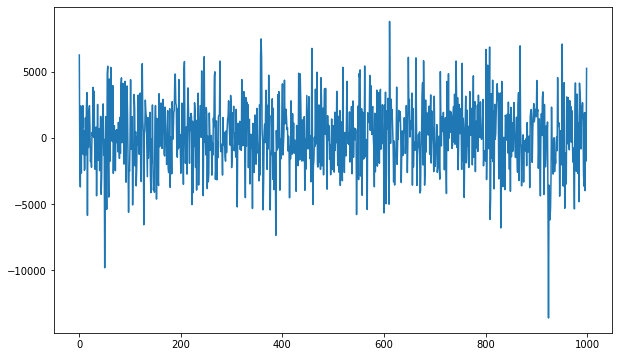

In [41]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(traces[20][1])

In [43]:
fname = "2020_6_11.hdf"
data = get_photon_pulses(fname, ["1591909688 pmt_checks_table_-1100V"])

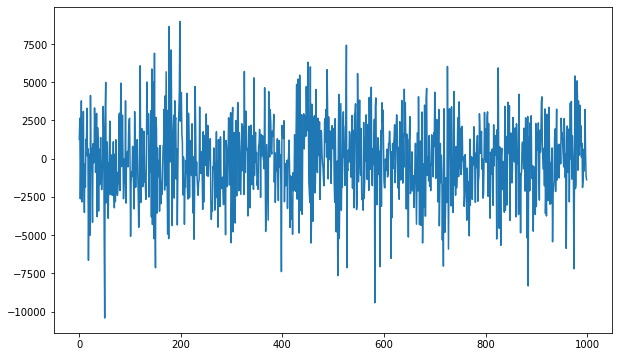

In [44]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(data[100][1])

In [45]:
heights = np.abs(np.array(list(zip(*data))[0], dtype = int))
photons = np.array(list(zip(*data))[1], dtype = int)

In [46]:
len(heights)

1255527

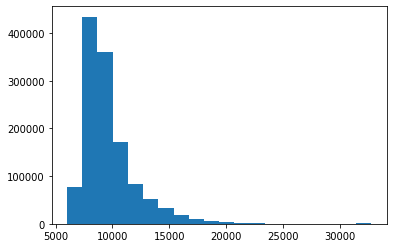

In [378]:
plt.figure()
plt.hist(heights, bins = 20);

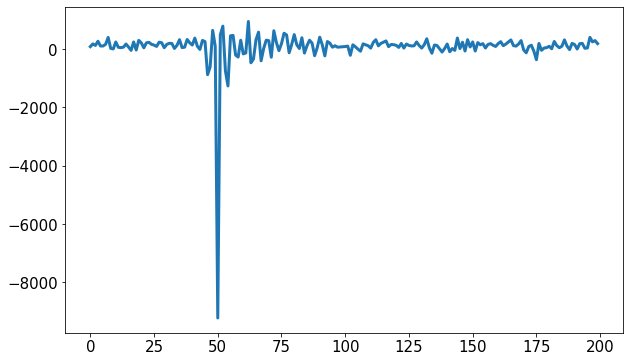

In [379]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(np.mean(photons, axis = 0)[:200], lw = 3)

set_fontsize(ax, 15)

In [380]:
from utils.binning_utils import *

In [381]:
bins, binned_data = bin_data(heights, photons, bins = None, width = 2500)
binned_data_averaged = {}
for b in bins:
    binned_data_averaged[b] = np.mean(binned_data[b], axis = 0)

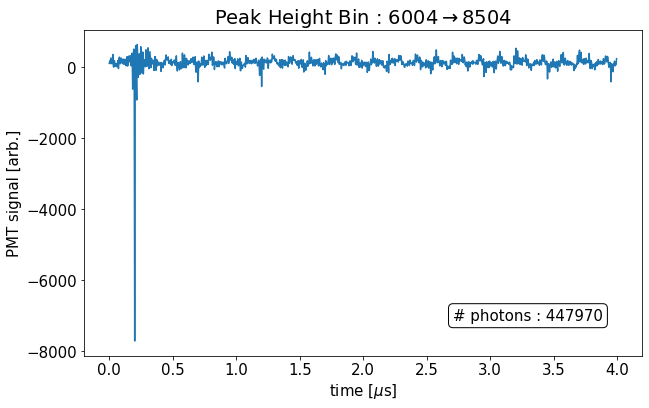

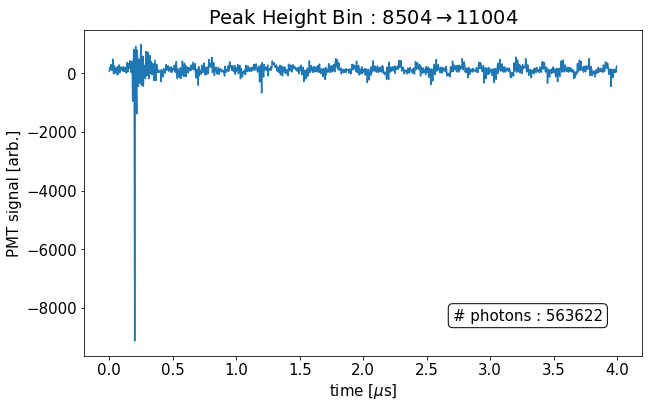

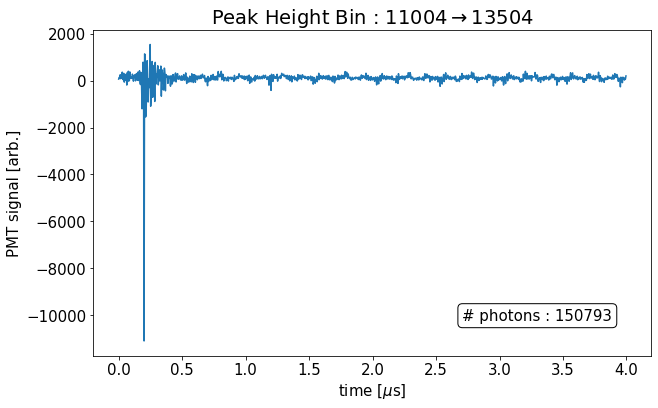

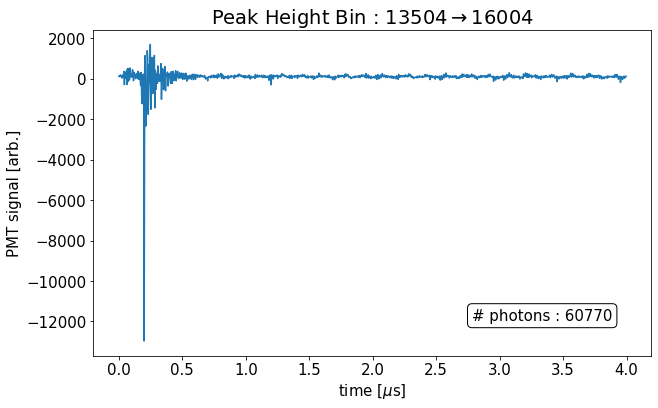

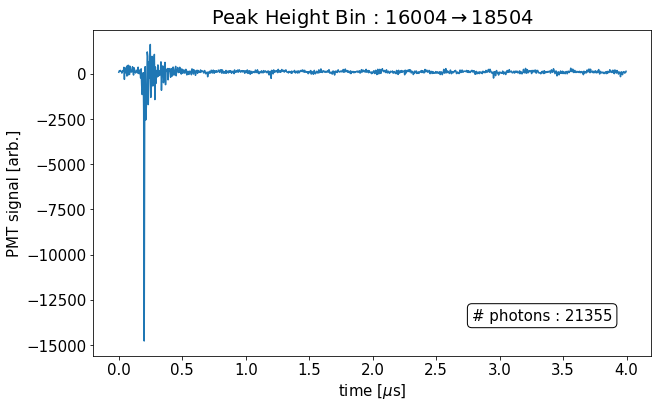

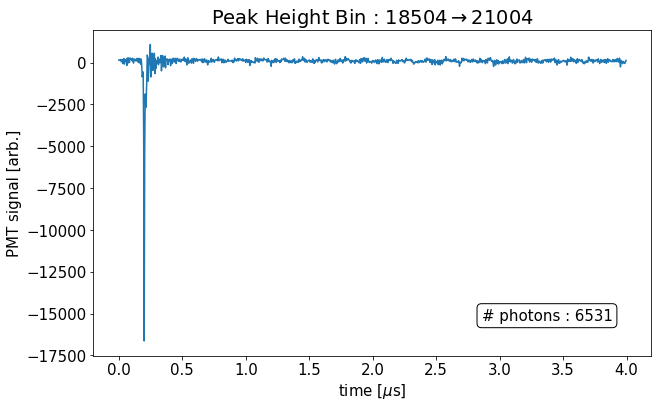

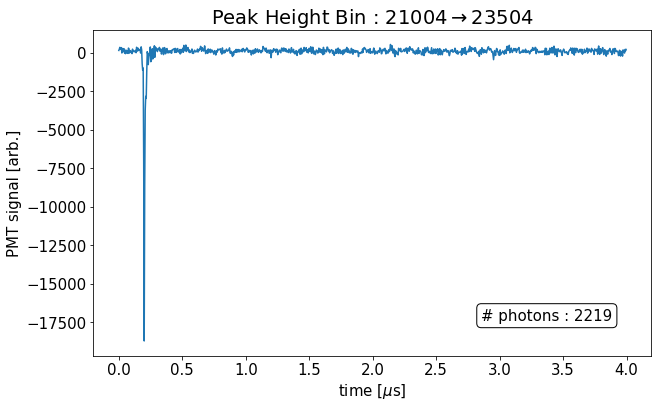

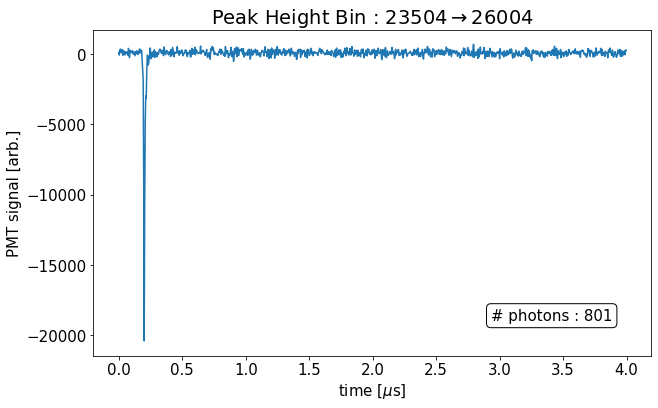

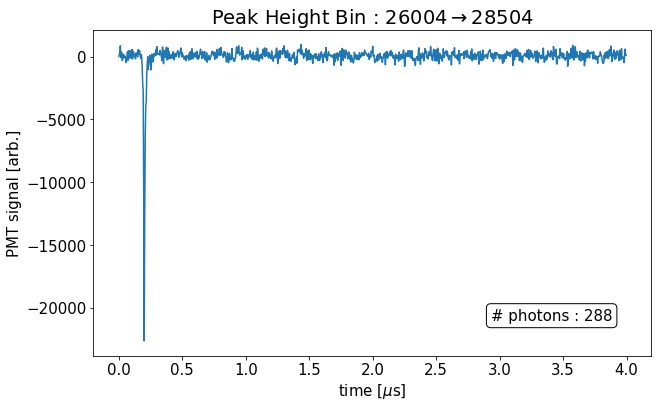

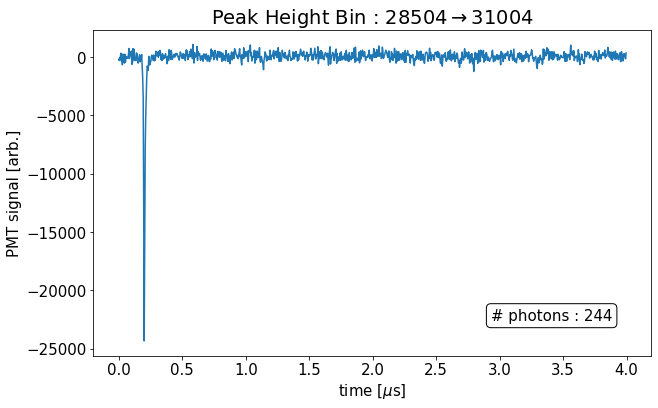

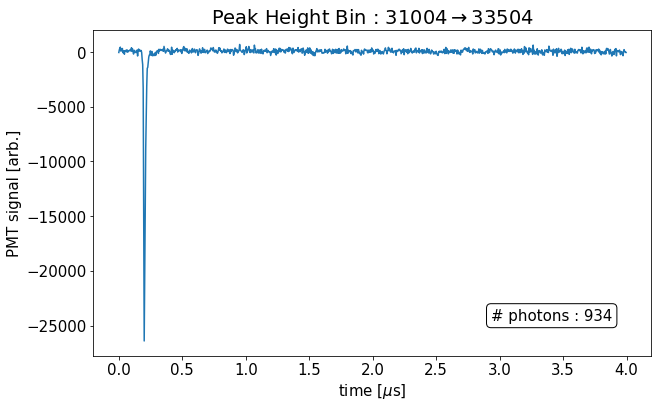

In [382]:
props = dict(boxstyle='round', facecolor='white', alpha=1)

for b in bins:
    fig, ax = plt.subplots(figsize = (10,6))
    dat = binned_data_averaged[b]
    ax.plot(np.arange(len(dat))*4e-9*1e6, dat)
    ax.set_xlabel('time [$\mu$s]')
    ax.set_ylabel('PMT signal [arb.]')
    ax.set_title(f'Peak Height Bin : {b:.0f}'+r'$\rightarrow$'+f'{b+2500:.0f}')
    txt = f'# photons : {len(binned_data[b])}'
    ax.text(0.93,0.1,txt, transform = ax.transAxes, fontsize = 15, verticalalignment = 'bottom', horizontalalignment = 'right',
           bbox = props)
    set_fontsize(ax, 15)

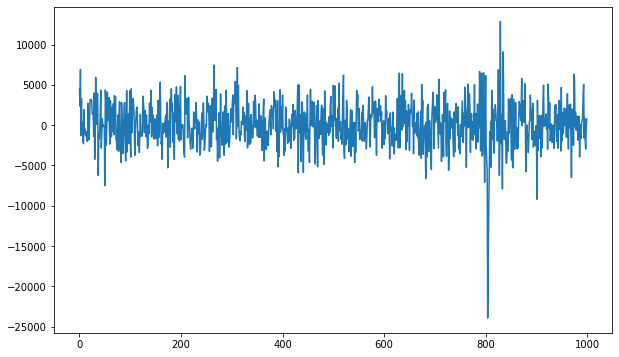

In [402]:
dat = binned_data[23504][3]
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(dat)

In [403]:
np.argmin(dat)

804

In [400]:
cnt = 0
for idx in range(len(binned_data[23504])):
    if (binned_data[23504][idx-1].flatten() == binned_data[23504][idx].flatten()).all():
        cnt += 1
cnt

515